In [19]:
import numpy as np
np.random.seed(2017)

import os
import time
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.models import load_model
import tkinter as tk
from tkinter import filedialog

import os
import itertools
import shutil
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Reshape, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import load_model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd 
from glob import glob
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
import cv2

2.7.0


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
# os.chdir('E:\OculoGuard_Mobile_app-main\Backend\Model 02\Data')
# if os.path.isdir('\Data') is False: 
#     os.mkdir('train')
# #     os.mkdir('valid')
#     os.mkdir('test')
#     filenames = ["DR","Glaucoma_Positive","Macular_Edema","Normal"]
#     for i in filenames:
#         shutil.move(f'{i}', 'train')
# #         os.mkdir(f'valid/{i}')
#         os.mkdir(f'test/{i}')

# #         valid_samples = random.sample(os.listdir(f'train/{i}'), int(len(os.listdir(f'train/{i}'))*0.2))
# #         for j in valid_samples:
# #             shutil.move(f'train/{i}/{j}', f'valid/{i}')

#         test_samples = random.sample(os.listdir(f'train/{i}'), int(len(os.listdir(f'train/{i}'))*0.3))
#         for k in test_samples:
#             shutil.move(f'train/{i}/{k}', f'test/{i}')
# os.chdir('..')

In [4]:
train_path = 'E:/OculoGuard_Mobile_app-main/Backend/Model 02/Data/train'

test_path = 'E:/OculoGuard_Mobile_app-main/Backend/Model 02/Data/test'

# train_batches = ImageDataGenerator(
#                                   preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
#                                   rotation_range=10, 
#                                   width_shift_range=0.1, 
#                                   height_shift_range=0.1, 
#                                   shear_range=0.15, 
#                                   zoom_range=0.1, 
#                                   channel_shift_range=10., 
#                                   horizontal_flip=True
#                                   ).flow_from_directory(
#                                                        directory=train_path, 
#                                                        target_size=(224,224),
#                                                        batch_size=16
#                                                       )

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=1000 )

# valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
#     directory=valid_path, target_size=(224,224), batch_size=795 )
    
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=1248 , shuffle=False)

Found 2917 images belonging to 4 classes.
Found 1248 images belonging to 4 classes.


In [5]:
train_batches.class_indices

{'DR': 0, 'Glaucoma_Positive': 1, 'Macular_Edema': 2, 'Normal': 3}

In [6]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()
print(len(mobile.layers))

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [7]:
x = mobile.layers[-6].output

GVP =  tf.keras.layers.GlobalAveragePooling2D()(x)
output = Dense(units=4, activation='softmax')(GVP)

model_1 = Model(inputs=mobile.input, outputs=output)

model_2 = Model(inputs=mobile.input, outputs=output)

for layer in model_1.layers[:-23]:
    layer.trainable = False

for layer in model_2.layers[:-23]:
    layer.trainable = False
    
model_1.summary() 
print(len(model_1.layers))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [8]:
## ======================================================================
#        Train with the Noised set and noised validation and Test
#======================================================================
tf.random.set_seed(959)
class_weight = {0: 1/5,
                1: 1,
                2: 2,
                3: 1/5}
model_1.compile(optimizer=Adam(lr=0.00003), loss='categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(
    train_batches, 
    epochs=40, 
    steps_per_epoch=len(train_batches), 
    validation_data = test_batches,
    verbose = 1,
    validation_steps=len(test_batches),
    class_weight=class_weight)

model_1.save('models/model.h5')

c:\users\imesh\appdata\local\programs\python\python38\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
3/3 [==============================] - 59s 23s/step - loss: 0.6675 - accuracy: 0.2290 - val_loss: 2.0344 - val_accuracy: 0.0657
Epoch 2/40
3/3 [==============================] - 24s 9s/step - loss: 0.5193 - accuracy: 0.2784 - val_loss: 1.9239 - val_accuracy: 0.0625
Epoch 3/40
3/3 [==============================] - 23s 9s/step - loss: 0.4096 - accuracy: 0.3438 - val_loss: 1.8175 - val_accuracy: 0.0737
Epoch 4/40
3/3 [==============================] - 23s 9s/step - loss: 0.3267 - accuracy: 0.4124 - val_loss: 1.7227 - val_accuracy: 0.1306
Epoch 5/40
3/3 [==============================] - 23s 9s/step - loss: 0.2611 - accuracy: 0.5441 - val_loss: 1.6371 - val_accuracy: 0.2508
Epoch 6/40
3/3 [==============================] - 24s 9s/step - loss: 0.2098 - accuracy: 0.6730 - val_loss: 1.5675 - val_accuracy: 0.3550
Epoch 7/40
3/3 [==============================] - 23s 9s/step - loss: 0.1715 - accuracy: 0.7635 - val_loss: 1.5189 - val_accuracy: 0.3990
Epoch 8/40
3/3 [=================

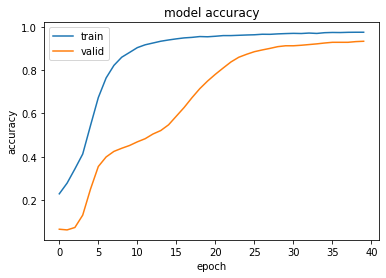

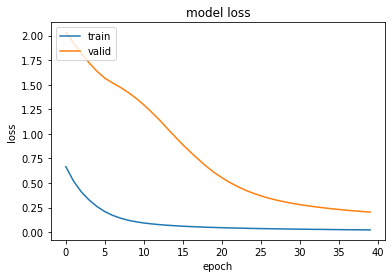

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [10]:
#model = load_model('models/model.h5')

test_labels = test_batches.classes
predictions = model_1.predict(x=test_batches, steps=len(test_batches), verbose=1)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

1/1 [==============================] - 7s 7s/step


In [11]:
train_batches.class_indices

{'DR': 0, 'Glaucoma_Positive': 1, 'Macular_Edema': 2, 'Normal': 3}

In [12]:
y_pred_bool = np.argmax(predictions, axis=1)

print(classification_report(test_labels, y_pred_bool))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       557
           1       0.86      1.00      0.93        50
           2       1.00      0.54      0.70       100
           3       0.94      0.98      0.96       541

    accuracy                           0.93      1248
   macro avg       0.93      0.87      0.88      1248
weighted avg       0.94      0.93      0.93      1248



Confusion matrix, without normalization
[[531   2   0  24]
 [  0  50   0   0]
 [ 31   6  54   9]
 [ 12   0   0 529]]


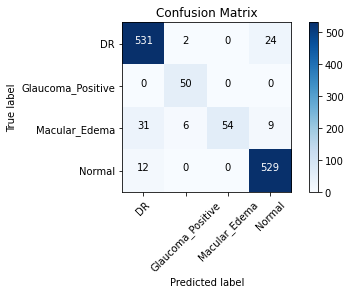

In [13]:
test_batches.class_indices

cm_plot_labels = [i for i in train_batches.class_indices]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [14]:
model_1.save('models/model_final.h5')

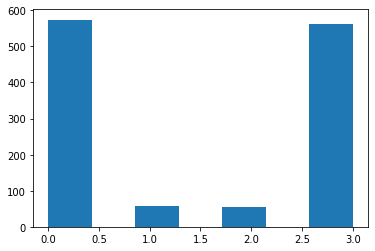

In [15]:
plt.hist(y_pred_bool, bins = 7)
plt.show()

In [20]:
root = tk.Tk()
root.withdraw()
img_path = filedialog.askopenfilename()

In [17]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

NameError: name 'img_path' is not defined

In [18]:
x = tf.keras.applications.mobilenet.preprocess_input(x)
pr=model_1.predict(x)
pr1=np.argmax(pr)
print('\n\n\nResult=',pr1)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [ ]:
pr